In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
df = pd.read_csv('/content/Phishing_Email.csv', on_bad_lines='skip')

In [6]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = text.strip()  # hapus spasi diawal/akhir
    words = text.split()
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    words = [ps.stem(w) for w in words if not w in stop_words]  # stemming dan hapus stopwords
    return ' '.join(words)

df['Email Text'] = df['Email Text'].astype(str)  # pastikan tipe data string
df['clean_text'] = df['Email Text'].apply(clean_text)

In [7]:
df['label'] = df['Email Type'].map({'Safe Email': 0, 'Phishing Email': 1})

In [8]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [10]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [20]:
y_pred = model.predict(X_test_vec)

In [21]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

In [22]:
print("Confusion Matrix:")
print(f"True Negative (Aman diprediksi Aman)   : {tn}")
print(f"False Positive (Aman diprediksi Spam)  : {fp}")
print(f"False Negative (Spam diprediksi Aman)  : {fn}")
print(f"True Positive (Spam diprediksi Spam)   : {tp}")

Confusion Matrix:
True Negative (Aman diprediksi Aman)   : 2236
False Positive (Aman diprediksi Spam)  : 37
False Negative (Spam diprediksi Aman)  : 261
True Positive (Spam diprediksi Spam)   : 1196


In [23]:
print("\nMatrix Format:")
print(f"[[{tn} {fp}]\n [{fn} {tp}]]")


Matrix Format:
[[2236 37]
 [261 1196]]


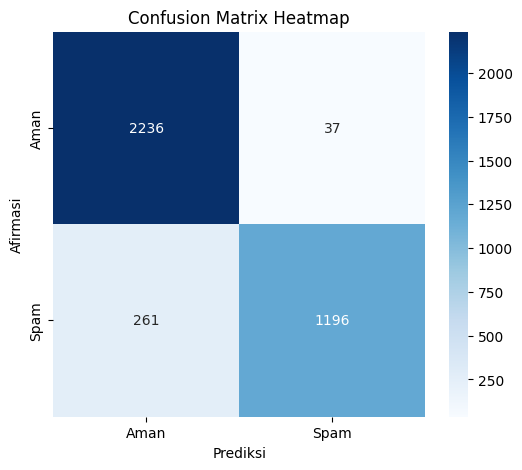

In [26]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Aman', 'Spam'], yticklabels=['Aman', 'Spam'])
plt.xlabel('Prediksi')
plt.ylabel('Afirmasi')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [19]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2273
           1       0.97      0.82      0.89      1457

    accuracy                           0.92      3730
   macro avg       0.93      0.90      0.91      3730
weighted avg       0.92      0.92      0.92      3730



In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2273
           1       0.97      0.82      0.89      1457

    accuracy                           0.92      3730
   macro avg       0.93      0.90      0.91      3730
weighted avg       0.92      0.92      0.92      3730



In [16]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.9201072386058982
